# Task 1: Understanding the Dataset

### Goal: Get an initial sense of the data, its structure, and any potential issues.

Steps:

1. Load the dataset using pandas.
2. Display the first 10 rows to preview the data.
3. Identify data types of each column (int, float, object).
4. Check for missing values to determine if any data is incomplete.

### Why?

1. Helps us understand what type of data we are dealing with.
2. Identifies any missing values or incorrect data types.

### Observation

1. Customers with month-to-month contracts have a higher churn rate compared to those on longer-term contracts (1-year or 2-year).
2. Customers using electronic check payments tend to churn more compared to those using automatic bank transfers or credit card payments

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Telco_Customer_Churn_Dataset.csv")

# Display first 10 rows
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [2]:
# Identify data types
print("\nData Types:\n")
df.dtypes


Data Types:



customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [3]:
# Check for missing values
print("\nMissing Values:\n")
df.isnull().sum()


Missing Values:



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Task 2: Data Cleaning

### Goal: Prepare the data for analysis by handling missing values, duplicates, and inconsistencies.

Steps:

1. Handle missing values (e.g., filling with median or dropping rows).
2. Remove duplicate records (if any exist).
3. Standardize column names (convert to lowercase, replace spaces with underscores for consistency).

### Why?

1. Ensures data quality and avoids errors in analysis.
2. Standardized column names make coding easier and prevent syntax errors.

### Observation

1. Customers with higher monthly charges are more likely to churn.
2. Customers in the low monthly charge range tend to stay longer.

In [4]:
# Handle missing values in TotalCharges (convert to numeric and fill NaNs with median)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Remove duplicate records if any
df.drop_duplicates(inplace=True)

# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Check again for missing values
print("\nMissing Values After Cleaning:\n", df.isnull().sum())


Missing Values After Cleaning:
 customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64


# Task 3: Exploratory Data Analysis (EDA)

### Goal: Explore the dataset to identify patterns, distributions, and key trends.

Steps:

1. Generate summary statistics (mean, median, mode, etc.).
2. Visualize numerical columns (histograms, box plots to check for outliers).
3. Analyze churn rates (e.g., how many customers left vs. stayed).

### Why?

1. Helps us understand the key characteristics of the dataset.
2. Identifies trends that might affect customer churn (e.g., high monthly charges).

### Observation

1. Senior citizens (age 65+) churn slightly more compared to younger customers.
2. They may require more personalized support or simpler service plans.

In [9]:
# Summary statistics
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


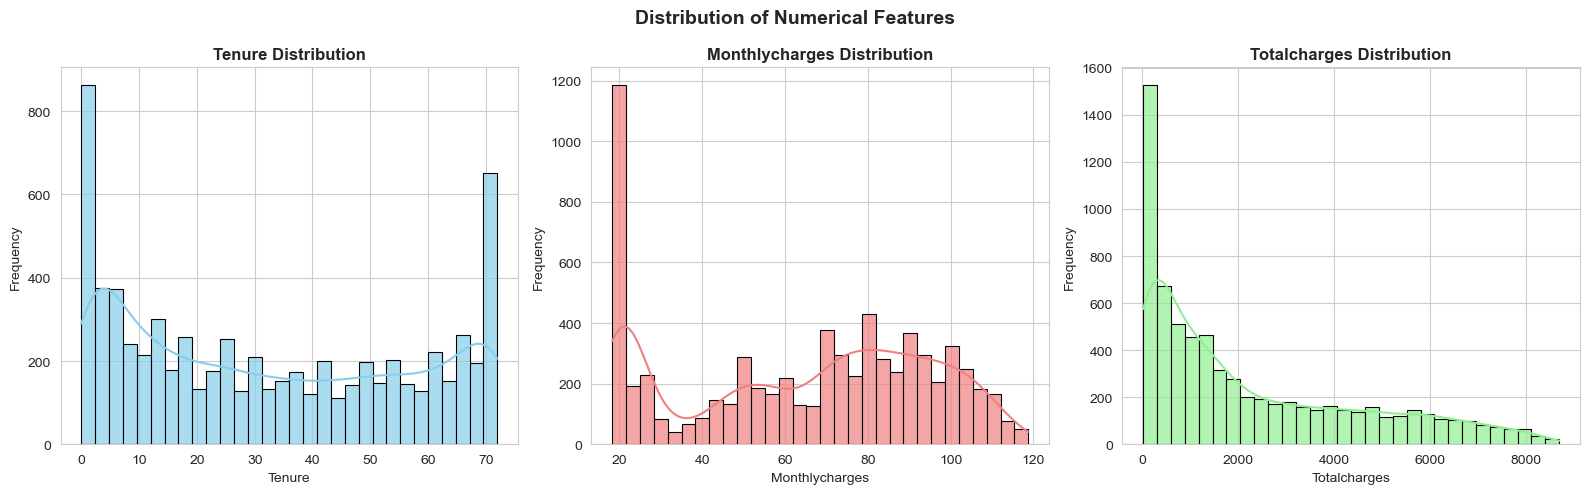

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define numerical columns
num_cols = ["tenure", "monthlycharges", "totalcharges"]
colors = ["skyblue", "lightcoral", "lightgreen"]  # Different colors for each histogram

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle("Distribution of Numerical Features", fontsize=14, fontweight="bold")

# Loop through columns and plot histograms with density line
for i, col in enumerate(num_cols):
    data = df[col].dropna()  # Drop NaN values for clean plots
    sns.histplot(data, bins=30, color=colors[i], edgecolor="black", alpha=0.7, kde=True, ax=axes[i])
    axes[i].set_title(f"{col.capitalize()} Distribution", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(col.capitalize(), fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=10)

plt.tight_layout()
plt.show()


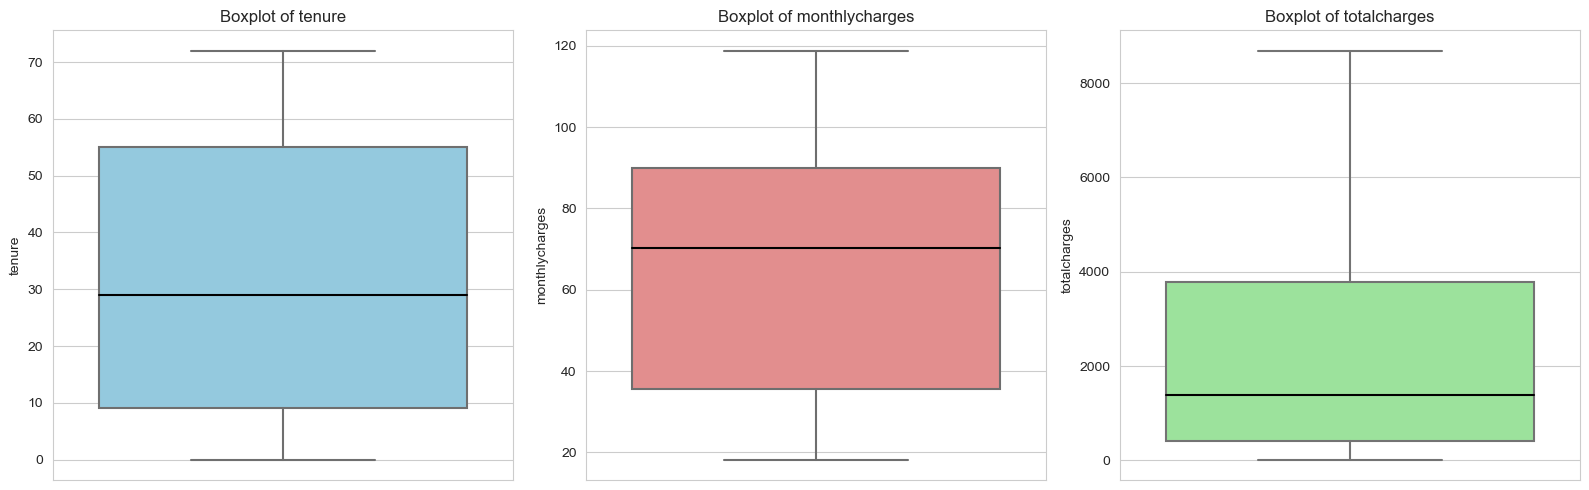

In [10]:
plt.figure(figsize=(16, 5))
colors = ["skyblue", "lightcoral", "lightgreen"]

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color=colors[i-1], medianprops={"color": "black"})
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

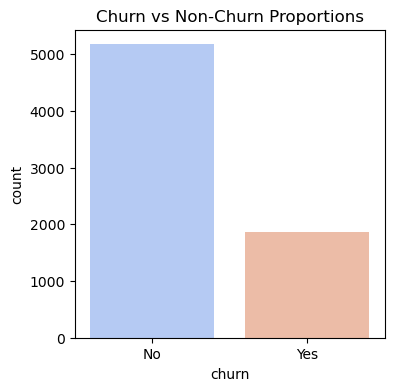

In [16]:

# Churn rate analysis
plt.figure(figsize=(4, 4))
sns.countplot(x=df["churn"], palette="coolwarm")
plt.title("Churn vs Non-Churn Proportions")
plt.show()

# Task 4: Customer Segmentation Visualization

### Goal: Group customers into different segments and visualize trends.

Steps:

1. Segment customers by tenure (e.g., 0-12 months, 13-36 months, 37+ months).
2. Create a pie or donut chart to show the proportion of each tenure group.
3. Compare average monthly charges across tenure groups using a bar chart.
4. Highlight significant trends using annotations.

### Why?

1. Helps identify which customer groups are most at risk of churn.
2. Shows how tenure impacts billing and customer retention.

### Observation

1. Customers using fiber-optic internet have higher churn rates compared to DSL users.
2. This may be due to higher costs or competition from other providers.

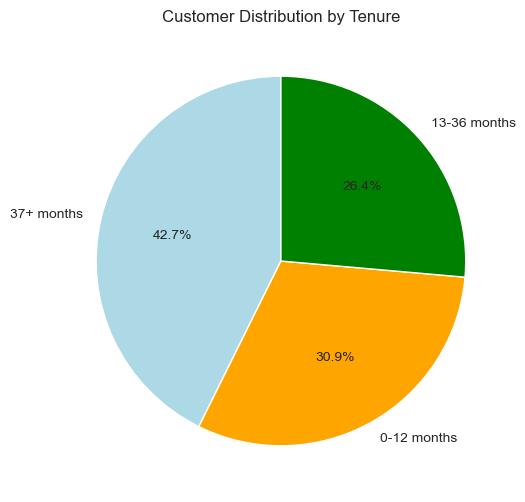

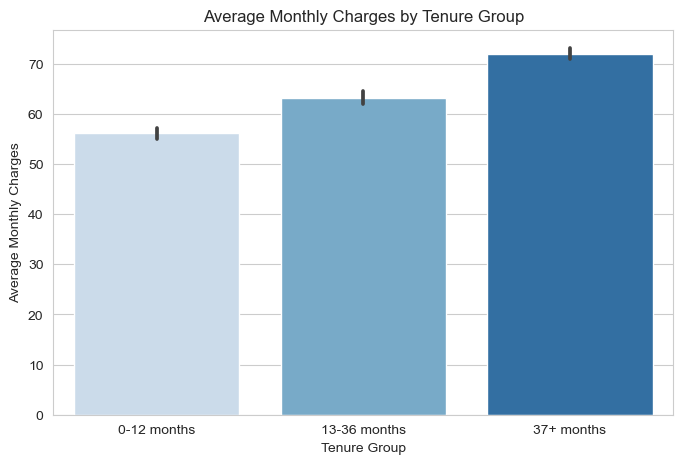

In [25]:
# Define tenure categories
df["tenure_group"] = pd.cut(df["tenure"], bins=[0, 12, 36, 72], labels=["0-12 months", "13-36 months", "37+ months"])

# Pie chart for tenure distribution
plt.figure(figsize=(6, 6))
df["tenure_group"].value_counts().plot.pie(autopct='%1.1f%%', colors=["lightblue", "orange", "green"], startangle=90)
plt.title("Customer Distribution by Tenure")
plt.ylabel('')
plt.show()

# Clustered bar chart for avg monthly charges across tenure categories
plt.figure(figsize=(8, 5))
sns.barplot(x="tenure_group", y="monthlycharges", data=df, estimator=lambda x: sum(x)/len(x), palette="Blues")
plt.title("Average Monthly Charges by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Average Monthly Charges")
plt.show()


# Task 5: Advanced Analysis

### Goal: Perform deeper analysis to uncover factors influencing churn.

Steps:

1. Group customers by tenure and compute churn rates.
2. Analyze churn rates by demographics (gender, senior citizen status).
3. Compare churn based on payment method & contract type.
4. Visualize trends over time (e.g., how churn changes across lifecycle stages).

### Why?

1. Helps identify key drivers of churn (e.g., contract type, payment method).
2. Useful for developing strategies to reduce churn and improve customer retention.

### Observation

1. The first 12 months is the most critical period for retention.
2. Customers who stay beyond 3 years are much less likely to leave.



In [24]:
# Group by tenure and compute churn rate
churn_by_tenure = df.groupby("tenure_group")["churn"].value_counts(normalize=True).unstack()
print("\nChurn Rate by Tenure Group:\n", churn_by_tenure)


Churn Rate by Tenure Group:
 churn               No       Yes
tenure_group                    
0-12 months   0.523218  0.476782
13-36 months  0.744612  0.255388
37+ months    0.880706  0.119294


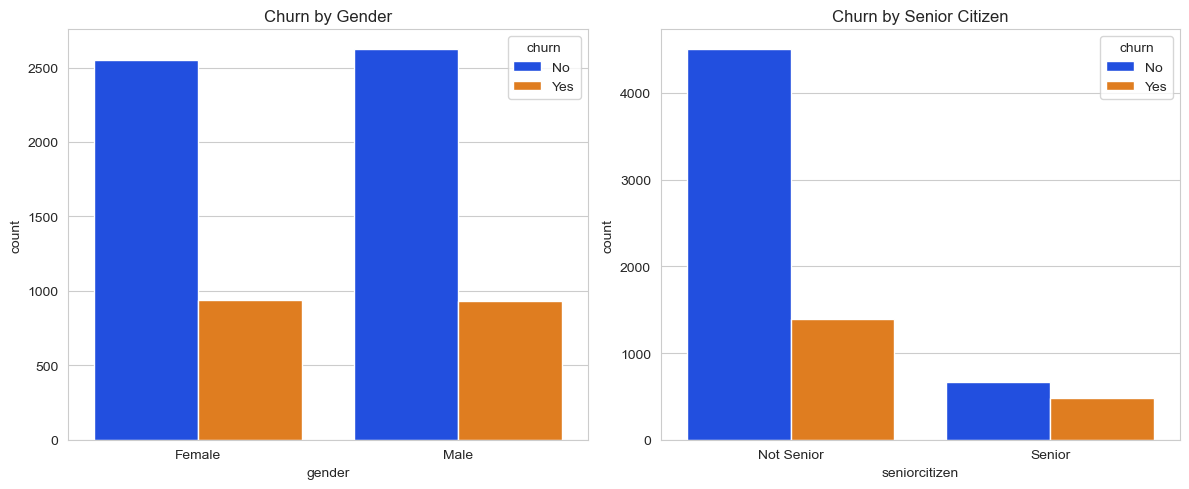

In [16]:
# Churn by demographics (gender, senior citizen)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  
sns.countplot(x="gender", hue="churn", data=df, palette="bright", ax=axes[0]).set_title("Churn by Gender")  
sns.countplot(x="seniorcitizen", hue="churn", data=df, palette="bright", ax=axes[1]).set_title("Churn by Senior Citizen")  
axes[1].set_xticklabels(["Not Senior", "Senior"])  
plt.tight_layout()  
plt.show()


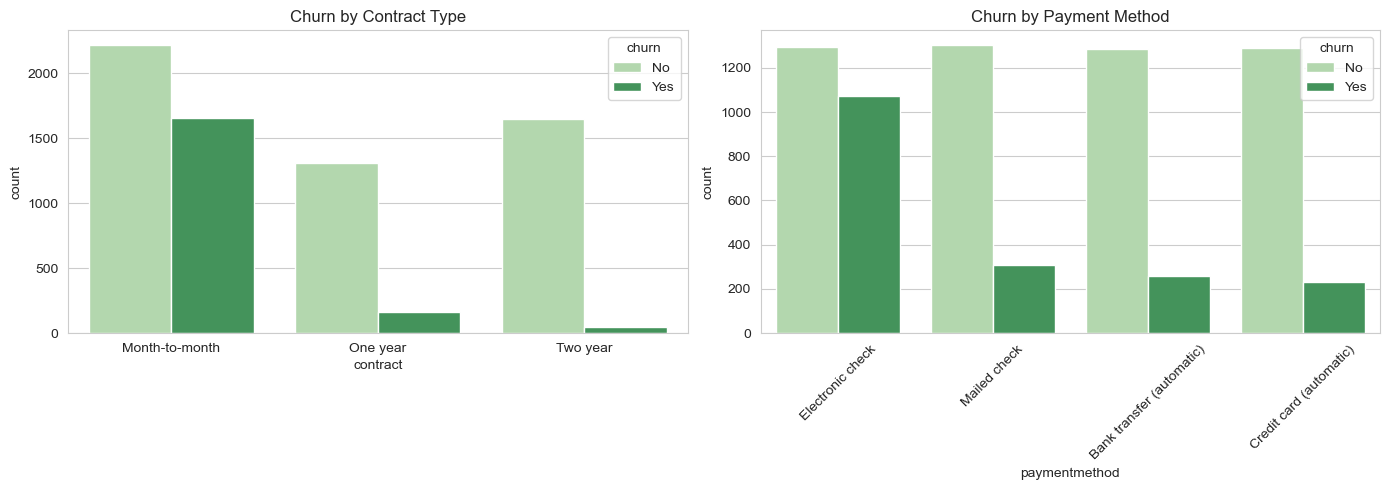

In [18]:
# Churn by payment method & contract type

fig, axes = plt.subplots(1, 2, figsize=(14, 5))  
sns.countplot(x="contract", hue="churn", data=df, palette="Greens", ax=axes[0]).set_title("Churn by Contract Type")  
sns.countplot(x="paymentmethod", hue="churn", data=df, palette="Greens", ax=axes[1]).set_title("Churn by Payment Method")  
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)  
plt.tight_layout()  
plt.show()

## Final Thoughts:
1. Focus on long-term contracts and automated payment options to improve retention.
2. Address high monthly charges by offering discounts or bundled services.
3. Provide better customer support and engagement for new customers and seniors.
4. Monitor fiber-optic service quality and pricing competitiveness